In [2]:
import decoder as dc
import numpy as np
import matplotlib.pyplot as plt

/home/elyall/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import importlib
importlib.reload(dc)

NameError: name 'dc' is not defined

In [1]:
# fn = '/Users/elyall/Dropbox/Data/7737_326_001.h5'
fn = [
    '/media/elyall/Data3/Decoding/C1_neurons/7142_220_002.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/6994_210_000.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7120_250_003.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7197_160_001.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7734_338_000.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7734_308_001.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7736_300_000.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7736_265_001.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7737_291_000.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/7737_326_001.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/9019_165_000.h5',
    '/media/elyall/Data3/Decoding/C1_neurons/9025_180_002.h5',
]

# Single Mouse

In [26]:
# Load single mouse's data
pred, perc_correct, number_of_neurons, StimLog, StimID, classifiers \
    = dc.load_output(fn[0])

In [ ]:
# Display performance
fig, ax = dc.plot_performance(perc_correct, number_of_neurons, classifiers)
ax.set_xscale('log')
ax.set_title(fn)

# # Save plot
# fig.savefig(ID + '_percCorrect.pdf')

(<matplotlib.figure.Figure at 0x7fbc7405c390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbc74558518>)

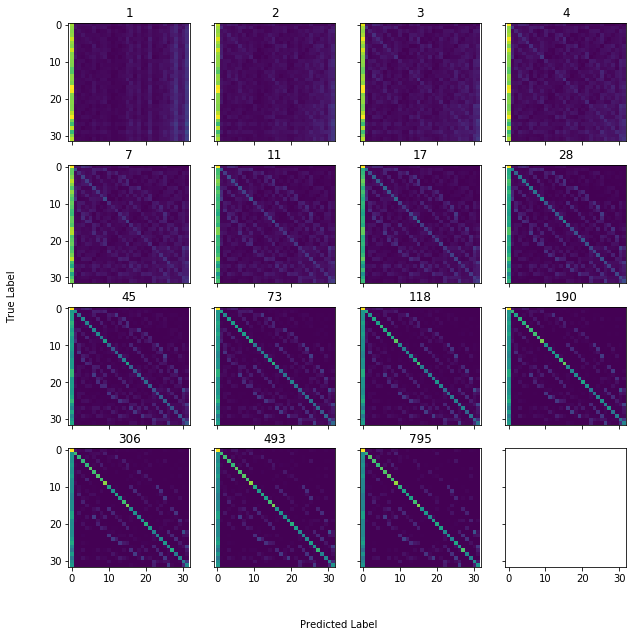

In [28]:
# Display confusion matrices
pred_id = dc.log_2_ID(pred, StimLog)
dc.plot_confusion_matrices(pred_id, StimID, number_of_neurons, C=0)

# Multiple Mice

In [3]:
# Load multiple mice's data
pred, perc_correct, number_of_neurons, StimID, classifiers \
    = dc.load_mult(fn)

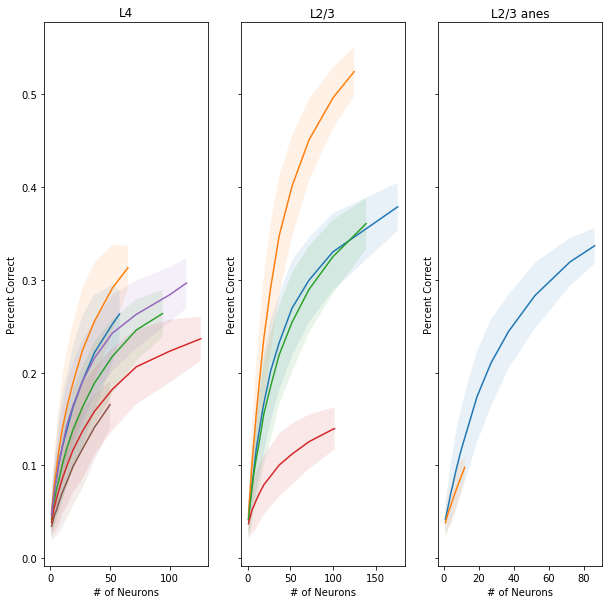

In [5]:
# Display performance
fig, ax = plt.subplots(1,3,figsize=(10,10),sharey=True)
for n, (pc, nn, c) in enumerate(zip(perc_correct,number_of_neurons,classifiers)):
    if n<=3:
        dc.plot_performance(pc, nn, c, ax[1])
    elif n<=9:
        dc.plot_performance(pc, nn, c, ax[0])
    else:
        dc.plot_performance(pc, nn, c, ax[2])
# [a.set_xscale('log') for a in ax]
[a.get_legend().remove() for a in ax]
ax[0].title.set_text('L4')
ax[1].title.set_text('L2/3')
ax[2].title.set_text('L2/3 anes')
# [a.set_xlim(0,100) for a in ax]


# Save plot
fig.savefig('decoder_percCorrect.pdf')